## Experimenting with various image augmentations technique on the shipibo art dataset

This notebook contains a series of experiments on various data augmentation techniques that will be used to generate realistic images of art from the shpibo connibo tribe using Generative Adversarial Networks (GANs).

Image augmentation is a data manipulation technique that is commonly used with images in order to provide a larger and more general dataset for training neural networks and other machine learning algorithms. It can also be a useful techniques when the quantity of data is small. 


### considerations of the original images
With this dataset unfortunately, I will not be able to apply every data augmentation technique in the book as I wish to preserve some original aspects of the shipibo art. Indeed, this art is highly geometric and 'fractalic' in nature meaning that certain images transformations would lead to a certain decrease in generated image quality. However, I will have to make some sacrifices as I was only able to scrap a small dataset containing images of moderate quality. Image augmentation will help me improve the overal image quantity but has the downside of decreasing the end quality.



In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from PIL import Image,ImageOps,ImageChops

from keras.preprocessing.image import ImageDataGenerator

import os

### extracting the image border

Sometimes, the images contain a border on the side which can have a varying size. since we will be taking out slices later having a large border can be problematic. we count manually take this off from some images but with a large dataset this would be impractical.

this link details a good way of removing the image border. However, this technique should first be tested on the dataset to make sure that it doesnt remove large portions from the original image. This technique assumes that all images have a border which is not the case in our dataset so we will have to be careful

cropping
original size:  (810, 810)
new size:  (793, 793)


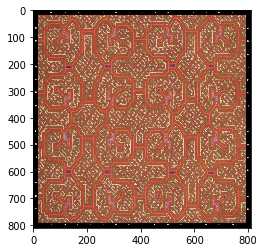

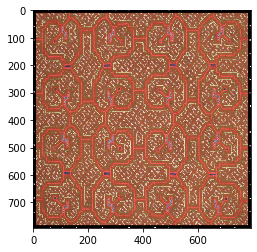

cropping
original size:  (210, 230)
new size:  (159, 53)


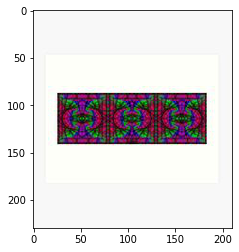

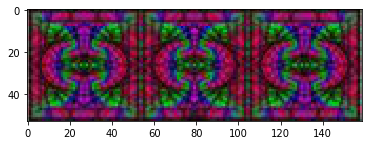

cropping
original size:  (600, 715)
new size:  (550, 663)


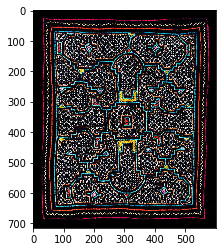

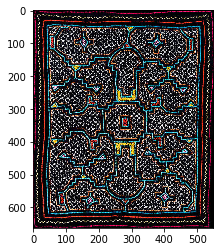

cropping
original size:  (1200, 739)
new size:  (1200, 739)


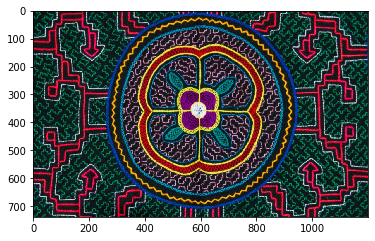

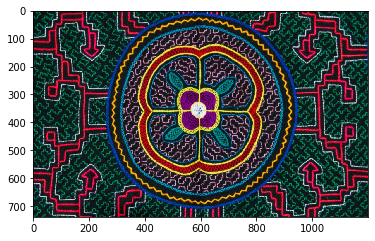

In [31]:
links = ["assets/00000000.jpg","assets/00000001.jpg","assets/00000002.jpg","assets/00000003.jpg"]

for link in links:
    
    im = Image.open(link)

    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        print("cropping")
        cropped_im = im.crop(bbox)
        
        print("original size: ",im.size)
        print("new size: ",cropped_im.size)
    else:
        print("not cropping?")
    
    plt.imshow(im)
    plt.show()
    
    plt.imshow(cropped_im)
    plt.show()

### Image slicing or patching

This method consists in augmenting the data by cutting out random portions from it with a random size. This technique is not always feasible if you need too see the entire image. If this is the case you could still perform the method but by taking patches which are a little bit smaller than the original image. That way, you still get most of the image but offset by a certain amount. 

The other method like mentioned in the begining is to take fixed size patches (not ones that depend on the original image size). this technique can greatly increase the amounts of data in the end but comes at the cost of sacrificing overall image quality and content as you are cutting out pretty significant portions of the image. Since every image is different and can have vastly different content, this method should be used with care.

assets/00000000.jpg


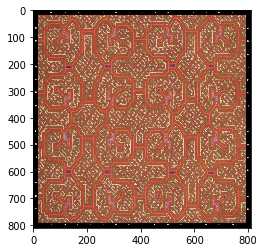

(810, 810) 1.0
good dims


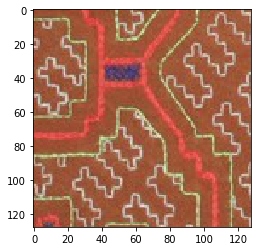

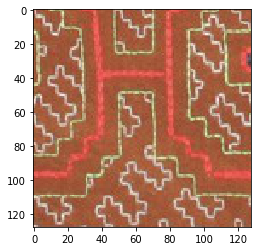

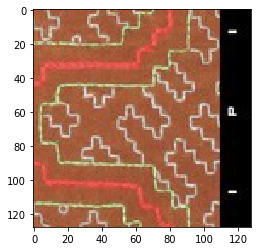

assets/00000001.jpg


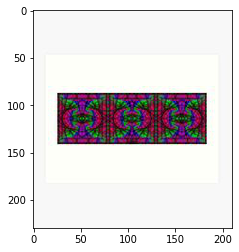

(210, 230) 0.9130434782608695
good dims


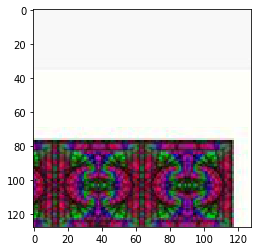

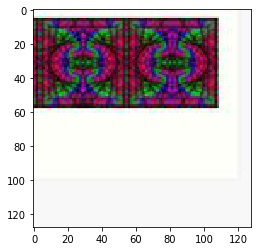

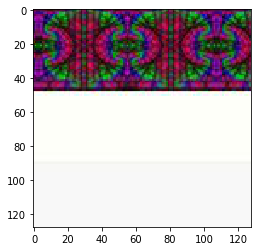

assets/00000002.jpg


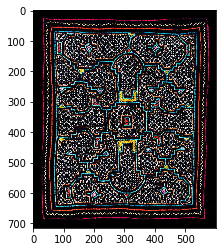

(600, 715) 0.8391608391608392
good dims


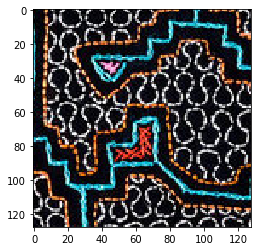

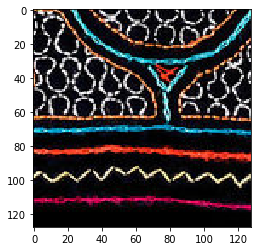

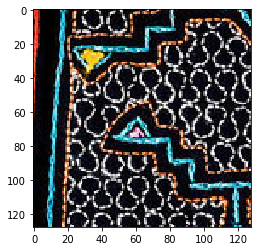

In [26]:
start_path = "assets/"

for num,file in enumerate(os.listdir(start_path)):
    
    if ".jpeg" in file or ".jpg" in file or ".png" in file:
        
        print(start_path + file)
        img = Image.open(start_path + file)
        
        plt.imshow(img)
        plt.show()
        
        #also have numpy array of image handy for making a copy later
        img_data = np.array(list(img.getdata())).reshape( (img.size[1],img.size[0],-1) ) 

        size =  img.size
        ratio = size[0]/size[1]
        print(size,ratio)

        n_patches = 3
        p_size= 128

        #check if image dimensions allow for slicing
        if size[0] > p_size and size[1] > p_size:
            #all good
            print("good dims")
        else:
            next

        #take slices from the image
        for i in range(n_patches):
            
            #generate random position coordinates
            ix = np.random.randint(0,size[1] - p_size)
            iy = np.random.randint(0,size[0] - p_size)
            
            #extract slice from image and paste it into a new image
            patch = np.copy(img_data[ix: ix + p_size, iy: iy + p_size]).astype(int)
            
            plt.imshow(patch)
            plt.show()
    
    if num == 4:
        break

### Image rotation and symetry

This technique may not be extremly usefull in our case as the patterns can be completely symetric which would render the transformation useless (invariant). but the patterns are usually not completely symetric. this is the same as flipping the image either vertically or horizontally.

In our case, fillping the original images would have led to only slight increases to image quantity and quality (if we consider the innate symetry of the shipibo art patterns). but since we have taken patches out of it and we dont care about their orientation very much we can allow ourselves to flip the images both vertically and horizontally

There is a class in keras that greatly simplifies these image transformation steps. we can make do with this in the end for the final image transformation steps.

https://keras.io/preprocessing/image/


or we can simmply make use of the Pillow library again

https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/

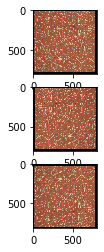

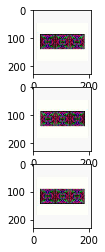

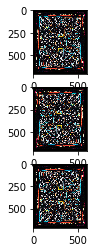

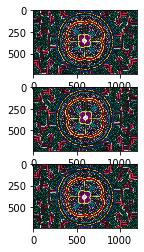

In [34]:
links = ["assets/00000000.jpg","assets/00000001.jpg","assets/00000002.jpg","assets/00000003.jpg"]

for link in links:
    
    im = Image.open(link)
    
    # horizontal flip
    hoz_flip = im.transpose(Image.FLIP_LEFT_RIGHT)
    # vertical flip
    ver_flip = im.transpose(Image.FLIP_TOP_BOTTOM)
    
    plt.subplot(3,1,1)
    plt.imshow(im)
    plt.subplot(3,1,2)
    plt.imshow(hoz_flip)
    plt.subplot(3,1,3)
    plt.imshow(ver_flip)
    plt.show()